# features data processing

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.chdir('../data/raw/')
os.listdir()

['data.csv',
 'data_preprocessed.csv',
 'images',
 'images.7z',
 'main_category.csv',
 'main_group_info.csv',
 'main_spatio_temporal_info.csv',
 'main_text.csv',
 'main_user_info.csv',
 'main_y.csv',
 'readme.md']

In [3]:
data = pd.read_csv('data.csv')
data.shape

(251295, 26)

In [4]:
# Display basic information about the dataset
print("Basic Information:")
print(data.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251295 entries, 0 to 251294
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   url                   251295 non-null  object 
 1   image                 251295 non-null  object 
 2   Pid                   251295 non-null  int64  
 3   Uid                   251295 non-null  object 
 4   Category              251295 non-null  object 
 5   Subcategory           251295 non-null  object 
 6   Concept               251295 non-null  object 
 7   Title                 242527 non-null  object 
 8   Alltags               251295 non-null  object 
 9   Geoaccuracy           251295 non-null  int64  
 10  Latitude              251295 non-null  float64
 11  Longitude             251295 non-null  float64
 12  Postdate              251295 non-null  int64  
 13  photo_firstdatetaken  251295 non-null  int64  
 14  photo_count           251295 non-

In [5]:
data.isna().sum()

url                         0
image                       0
Pid                         0
Uid                         0
Category                    0
Subcategory                 0
Concept                     0
Title                    8768
Alltags                     0
Geoaccuracy                 0
Latitude                    0
Longitude                   0
Postdate                    0
photo_firstdatetaken        0
photo_count                 0
ispro                       0
canbuypro                   0
timezone_timezone_id        0
timezone_offset             0
user_description            0
location_description        0
Pathalias               77796
groups                      0
group_impact                0
group_weight                0
label                       0
dtype: int64

In [6]:
data['Title'].fillna(data['Category'] + ' ' + data['Subcategory'] + ' ' + data['Concept'] + ' ' + data['Alltags'], inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251295 entries, 0 to 251294
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   url                   251295 non-null  object 
 1   image                 251295 non-null  object 
 2   Pid                   251295 non-null  int64  
 3   Uid                   251295 non-null  object 
 4   Category              251295 non-null  object 
 5   Subcategory           251295 non-null  object 
 6   Concept               251295 non-null  object 
 7   Title                 251295 non-null  object 
 8   Alltags               251295 non-null  object 
 9   Geoaccuracy           251295 non-null  int64  
 10  Latitude              251295 non-null  float64
 11  Longitude             251295 non-null  float64
 12  Postdate              251295 non-null  int64  
 13  photo_firstdatetaken  251295 non-null  int64  
 14  photo_count           251295 non-null  int64  
 15  

In [8]:
# Descriptive statistics for numerical features
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print("\nDescriptive Statistics for Numerical Features:")
data.describe()


Descriptive Statistics for Numerical Features:


,Pid,Geoaccuracy,Latitude,Longitude,Postdate,photo_firstdatetaken,photo_count,ispro,canbuypro,timezone_timezone_id,timezone_offset,groups,group_impact,group_weight,label
count,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000
mean,395370.206,1.837,4.543,-2.626,1445062113.053,1992269298.635,14122.128,0.373,0.018,7.641,-1.606,5.310,3237.233,137490.975,6.358
std,222891.706,4.991,14.166,25.613,8434067.312,150610391.277,93377.528,0.484,0.132,10.480,4.268,25.276,11774.420,474315.791,2.446
min,775.000,0.000,-75.901,-159.336,1425139200.000,0.000,0.000,0.000,0.000,0.000,-12.000,0.000,0.000,0.000,1.000
25%,245612.500,0.000,0.000,0.000,1438827238.000,2003032614.000,647.000,0.000,0.000,2.000,-5.000,0.000,0.000,0.000,4.700
50%,329917.000,0.000,0.000,0.000,1446297726.000,2008010112.000,2744.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,6.190
75%,428500.500,0.000,0.000,0.000,1451971145.500,2012082416.000,9337.000,1.000,0.000,9.000,0.000,0.000,0.000,0.000,7.900
max,1118345.000,16.000,73.574,179.333,1456761253.000,2016072513.000,2978819.000,1.000,1.000,95.000,13.000,1307.000,349156.000,9351564.000,16.560


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['groups'] = scaler.fit_transform(data[['groups']])
data['group_impact'] = scaler.fit_transform(data[['group_impact']])
data['group_weight'] = scaler.fit_transform(data[['group_weight']])

data['photo_count'] = np.log1p(data['photo_count'])  # log1p handles zero values gracefully

In [10]:
data['Postdate']

0         1446016778
1         1454983379
2         1433118604
3         1425744438
4         1426916909
             ...    
251290    1433577362
251291    1439629953
251292    1444462129
251293    1442458947
251294    1426067443
Name: Postdate, Length: 251295, dtype: int64

In [11]:
data['Postdate'] = pd.to_datetime(data['Postdate'], unit='s')
data['Postdate']

0        2015-10-28 07:19:38
1        2016-02-09 02:02:59
2        2015-06-01 00:30:04
3        2015-03-07 16:07:18
4        2015-03-21 05:48:29
                 ...        
251290   2015-06-06 07:56:02
251291   2015-08-15 09:12:33
251292   2015-10-10 07:28:49
251293   2015-09-17 03:02:27
251294   2015-03-11 09:50:43
Name: Postdate, Length: 251295, dtype: datetime64[ns]

In [12]:
data['photo_firstdatetaken']

0         1904010100
1         1867010100
2         2005100100
3         1867010100
4         1867010100
             ...    
251290    1978071117
251291    2000010100
251292    2013051813
251293    2006052512
251294    2006052512
Name: photo_firstdatetaken, Length: 251295, dtype: int64

In [13]:
data['photo_firstdatetaken'] = pd.to_datetime(data['photo_firstdatetaken'], format='%Y%m%d%H', errors='coerce')
data['photo_firstdatetaken']

0        1904-01-01 00:00:00
1        1867-01-01 00:00:00
2        2005-10-01 00:00:00
3        1867-01-01 00:00:00
4        1867-01-01 00:00:00
                 ...        
251290   1978-07-11 17:00:00
251291   2000-01-01 00:00:00
251292   2013-05-18 13:00:00
251293   2006-05-25 12:00:00
251294   2006-05-25 12:00:00
Name: photo_firstdatetaken, Length: 251295, dtype: datetime64[ns]

In [14]:
# Descriptive statistics for numerical features
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print("\nDescriptive Statistics for Numerical Features:")
data.describe()


Descriptive Statistics for Numerical Features:


,Pid,Geoaccuracy,Latitude,Longitude,Postdate,photo_firstdatetaken,photo_count,ispro,canbuypro,timezone_timezone_id,timezone_offset,groups,group_impact,group_weight,label
count,251295.000,251295.000,251295.000,251295.000,251295,249723,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000
mean,395370.206,1.837,4.543,-2.626,2015-10-17 06:08:33.052507648,2004-02-25 21:12:38.496414208,7.797,0.373,0.018,7.641,-1.606,0.004,0.009,0.015,6.358
min,775.000,0.000,-75.901,-159.336,2015-02-28 16:00:00,1759-01-01 12:00:00,0.000,0.000,0.000,0.000,-12.000,0.000,0.000,0.000,1.000
25%,245612.500,0.000,0.000,0.000,2015-08-06 02:13:58,2003-05-09 16:00:00,6.474,0.000,0.000,2.000,-5.000,0.000,0.000,0.000,4.700
50%,329917.000,0.000,0.000,0.000,2015-10-31 13:22:06,2008-01-13 00:00:00,7.918,0.000,0.000,5.000,0.000,0.000,0.000,0.000,6.190
75%,428500.500,0.000,0.000,0.000,2016-01-05 05:19:05.500000,2012-09-10 02:00:00,9.142,1.000,0.000,9.000,0.000,0.000,0.000,0.000,7.900
max,1118345.000,16.000,73.574,179.333,2016-02-29 15:54:13,2016-07-25 13:00:00,14.907,1.000,1.000,95.000,13.000,1.000,1.000,1.000,16.560
std,222891.706,4.991,14.166,25.613,NaN,NaN,1.936,0.484,0.132,10.480,4.268,0.019,0.034,0.051,2.446


In [15]:
data['Latitude'].value_counts()

Latitude
0.000      220965
41.981        718
43.551        385
42.189        323
52.445        315
            ...  
-13.513         1
51.282          1
-32.057         1
-32.057         1
40.759          1
Name: count, Length: 15130, dtype: int64

In [16]:
data['Longitude'].value_counts()

Longitude
0.000       220979
-87.859        718
-73.107        453
7.019          385
-83.749        323
             ...  
-122.418         1
-73.739          1
-0.376           1
-0.291           1
-73.980          1
Name: count, Length: 14815, dtype: int64

In [17]:
data['Geoaccuracy'].value_counts()

Geoaccuracy
0     221057
16     20353
15      4869
14      1897
13      1177
12       916
11       441
9        212
10       201
8        111
7         24
6         13
5          9
4          8
3          5
2          2
Name: count, dtype: int64

In [18]:
data['location_description'].value_counts()

location_description
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [19]:
220000/data.shape[0]
# 87% missing values. Not useful for analysis

0.8754650908295032

In [20]:
data.drop(['Latitude', 'Longitude', 'Geoaccuracy', 'location_description'], axis=1, inplace=True)
data.shape

(251295, 22)

In [21]:
data.describe()

,Pid,Postdate,photo_firstdatetaken,photo_count,ispro,canbuypro,timezone_timezone_id,timezone_offset,groups,group_impact,group_weight,label
count,251295.000,251295,249723,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000,251295.000
mean,395370.206,2015-10-17 06:08:33.052507648,2004-02-25 21:12:38.496414208,7.797,0.373,0.018,7.641,-1.606,0.004,0.009,0.015,6.358
min,775.000,2015-02-28 16:00:00,1759-01-01 12:00:00,0.000,0.000,0.000,0.000,-12.000,0.000,0.000,0.000,1.000
25%,245612.500,2015-08-06 02:13:58,2003-05-09 16:00:00,6.474,0.000,0.000,2.000,-5.000,0.000,0.000,0.000,4.700
50%,329917.000,2015-10-31 13:22:06,2008-01-13 00:00:00,7.918,0.000,0.000,5.000,0.000,0.000,0.000,0.000,6.190
75%,428500.500,2016-01-05 05:19:05.500000,2012-09-10 02:00:00,9.142,1.000,0.000,9.000,0.000,0.000,0.000,0.000,7.900
max,1118345.000,2016-02-29 15:54:13,2016-07-25 13:00:00,14.907,1.000,1.000,95.000,13.000,1.000,1.000,1.000,16.560
std,222891.706,NaN,NaN,1.936,0.484,0.132,10.480,4.268,0.019,0.034,0.051,2.446


In [22]:
data.describe().columns

Index(['Pid', 'Postdate', 'photo_firstdatetaken', 'photo_count', 'ispro',
       'canbuypro', 'timezone_timezone_id', 'timezone_offset', 'groups',
       'group_impact', 'group_weight', 'label'],
      dtype='object')

In [23]:
data.columns

Index(['url', 'image', 'Pid', 'Uid', 'Category', 'Subcategory', 'Concept',
       'Title', 'Alltags', 'Postdate', 'photo_firstdatetaken', 'photo_count',
       'ispro', 'canbuypro', 'timezone_timezone_id', 'timezone_offset',
       'user_description', 'Pathalias', 'groups', 'group_impact',
       'group_weight', 'label'],
      dtype='object')

In [24]:
data.columns.difference(data.describe().columns)

Index(['Alltags', 'Category', 'Concept', 'Pathalias', 'Subcategory', 'Title',
       'Uid', 'image', 'url', 'user_description'],
      dtype='object')

In [25]:
data['Category'].value_counts()

Category
Travel&Active&Sports    55069
Holiday&Celebrations    47822
Fashion                 39090
Entertainment           23319
Social&People           18897
Whether&Season          16684
Animal                  16414
Food                    14032
Urban                   12366
Electronics              4059
Family                   3543
Name: count, dtype: int64

In [26]:
data['Subcategory'].value_counts()

Subcategory
Halloween        14586
Makeup           10075
Christmas         8876
Music             8705
Books             8611
                 ...  
Girls               84
Girls,Fashion       77
General             74
Holidays            28
Super                7
Name: count, Length: 77, dtype: int64

In [27]:
data['Concept'].value_counts()

Concept
hauntedhouse         1765
pumpkinpatch         1733
chilly               1649
quarterback          1626
trickortreat         1614
                     ... 
plot                    1
hockeylife              1
happythanksgiving       1
rainyweather            1
horseshow               1
Name: count, Length: 667, dtype: int64

In [28]:
data['Concept'].value_counts().describe([.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    667.000
mean     376.754
std      396.307
min        1.000
1%         2.000
5%        15.300
10%       27.600
25%       79.500
50%      201.000
75%      613.500
90%     1013.800
95%     1213.400
99%     1503.680
max     1765.000
Name: count, dtype: float64

In [29]:
data['Pathalias'].value_counts()

Pathalias
siomarq            1373
peeebeee           1120
esteemedhelga      1101
autisticreality    1096
estudioobjetivo    1059
                   ... 
imperatricks          1
afonsocastella        1
juanrojo              1
canadagood            1
matty3126             1
Name: count, Length: 19909, dtype: int64

In [30]:
77796/data.shape[0]

0.3095803736644183

In [31]:
tags=[]
data['Alltags'].apply(lambda x: tags.extend(x.split(' ')))
tags[0]

'rock'

In [32]:
len(tags)

5271084

In [33]:
from collections import Counter

# Assuming tags is your list of tags
tags_count = Counter(tags)

In [34]:
tags_count.most_common(10)

[('??', 28040),
 ('????', 23311),
 ('2015', 22815),
 ('photography', 19151),
 ('art', 16207),
 ('nature', 13894),
 ('beautiful', 13119),
 ('canon', 12198),
 ('travel', 11750),
 ('people', 10855)]

In [35]:
data['Postdate'].apply(lambda x:x.year).value_counts()

Postdate
2015    182877
2016     68418
Name: count, dtype: int64

In [36]:
# remove noisy and year tags
noise_tags=['??', '????', '2015', '2016']
def remove_top_tags(alltags):
    return ' '.join(tag for tag in alltags.split(' ') if tag not in noise_tags)

data['Alltags'] = data['Alltags'].apply(remove_top_tags)

In [37]:
data['Alltags'].apply(lambda x: len(x.split(' '))).describe()

count   251295.000
mean        20.652
std         17.059
min          1.000
25%          8.000
50%         15.000
75%         28.000
max         75.000
Name: Alltags, dtype: float64

In [38]:
data['Alltags']

0         rock punk transgender tranny electronicmusic e...
1         brazil rio brasil riodejaneiro by maria fifa m...
2         old cinema beauty marilyn photoshop movie joke...
3         hot sahara animal animals desert bottles drink...
4         street people india portraits photography delh...
                                ...                        
251290    york travel sky urban sun france color tree gr...
251291    portrait cute animal cat furry panasonic calic...
251292    car exotic german malaysia kualalumpur superca...
251293    city newzealand christchurch cloud building ca...
251294    city travel winter usa newyork skyline america...
Name: Alltags, Length: 251295, dtype: object

In [39]:
data['Postdate'].apply(lambda x:x.month).value_counts()

Postdate
2     36800
12    33017
1     31643
10    30407
11    23203
9     20939
7     16157
8     15020
5     14406
6     13605
3      8940
4      7158
Name: count, dtype: int64

In [40]:
data['Postdate'].apply(lambda x: (x.year, x.month)).value_counts().sort_index()

Postdate
(2015, 2)        25
(2015, 3)      8940
(2015, 4)      7158
(2015, 5)     14406
(2015, 6)     13605
(2015, 7)     16157
(2015, 8)     15020
(2015, 9)     20939
(2015, 10)    30407
(2015, 11)    23203
(2015, 12)    33017
(2016, 1)     31643
(2016, 2)     36775
Name: count, dtype: int64

In [41]:
data['Postdate']

0        2015-10-28 07:19:38
1        2016-02-09 02:02:59
2        2015-06-01 00:30:04
3        2015-03-07 16:07:18
4        2015-03-21 05:48:29
                 ...        
251290   2015-06-06 07:56:02
251291   2015-08-15 09:12:33
251292   2015-10-10 07:28:49
251293   2015-09-17 03:02:27
251294   2015-03-11 09:50:43
Name: Postdate, Length: 251295, dtype: datetime64[ns]

In [42]:
data['year'] = data['Postdate'].dt.year
data['month'] = data['Postdate'].dt.month
data['day'] = data['Postdate'].dt.day
data['hour'] = data['Postdate'].dt.hour
data['dayofweek'] = data['Postdate'].dt.dayofweek  # Monday=0, Sunday=6

In [43]:
data.columns

Index(['url', 'image', 'Pid', 'Uid', 'Category', 'Subcategory', 'Concept',
       'Title', 'Alltags', 'Postdate', 'photo_firstdatetaken', 'photo_count',
       'ispro', 'canbuypro', 'timezone_timezone_id', 'timezone_offset',
       'user_description', 'Pathalias', 'groups', 'group_impact',
       'group_weight', 'label', 'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [44]:
data['timezone_timezone_id'].value_counts()

timezone_timezone_id
2     90525
5     38403
10    27411
8     19595
0     15732
      ...  
87        1
83        1
95        1
76        1
85        1
Name: count, Length: 91, dtype: int64

In [45]:
data['timezone_offset'].value_counts()

timezone_offset
 0     110558
-8      38810
 1      28826
-5      28316
-6      12983
 8       5932
-3       4569
-7       3953
 2       3732
 10      3368
 9       2400
 7       1741
 3       1428
 5       1400
-4       1111
 12      1044
 6        303
-12       230
 4        228
-10       211
-9         59
-1         38
-2         35
-11        16
 13         4
Name: count, dtype: int64

In [46]:
data.head()

,url,image,Pid,Uid,Category,Subcategory,Concept,Title,Alltags,Postdate,...,Pathalias,groups,group_impact,group_weight,label,year,month,day,hour,dayofweek
0,https://www.flickr.com/photos/58708830@N00/385...,images/385070026.jpg,775,59@N75,Fashion,Fashion,glam,Luis Drayton - Edinburgh shoot #6,rock punk transgender tranny electronicmusic e...,2015-10-28 07:19:38,...,luisdrayton,0.026,0.012,0.026,11.180,2015,10,28,7,2
1,https://www.flickr.com/photos/97042891@N00/943...,images/943750056.jpg,1075,1@N18,Travel&Active&Sports,Soccer,fifa,Arena da Barra - Arena HSBC - Arena do PAN #...,brazil rio brasil riodejaneiro by maria fifa m...,2016-02-09 02:02:59,...,claudiolara,0.005,0.005,0.003,15.150,2016,2,9,2,1
2,https://www.flickr.com/photos/18583731@N07/324...,images/3246928439.jpg,4890,351@N64,Entertainment,Movies,cinema,MARILYN 2015,old cinema beauty marilyn photoshop movie joke...,2015-06-01 00:30:04,...,rizzato,0.000,0.000,0.000,10.990,2015,6,1,0,0
3,https://www.flickr.com/photos/35797910@N08/353...,images/3538960847.jpg,7079,1617@N40,Food,Drinks,thirsty,CAMELS01,hot sahara animal animals desert bottles drink...,2015-03-07 16:07:18,...,glosackmd,0.001,0.003,0.009,11.160,2015,3,7,16,5
4,https://www.flickr.com/photos/35797910@N08/354...,images/3544037429.jpg,7111,1617@N40,Travel&Active&Sports,Gymnastics,flip,INDIA0457/ MY CHRISTMAS 2015 CARD.........,street people india portraits photography delh...,2015-03-21 05:48:29,...,glosackmd,0.001,0.006,0.001,12.740,2015,3,21,5,5


In [47]:
data.reset_index(inplace=True, drop=True)

In [48]:
data.columns

Index(['url', 'image', 'Pid', 'Uid', 'Category', 'Subcategory', 'Concept',
       'Title', 'Alltags', 'Postdate', 'photo_firstdatetaken', 'photo_count',
       'ispro', 'canbuypro', 'timezone_timezone_id', 'timezone_offset',
       'user_description', 'Pathalias', 'groups', 'group_impact',
       'group_weight', 'label', 'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [49]:
data['user_description'].value_counts()

user_description
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [50]:
115833/data.shape[0]

0.4609443084820629

In [51]:
data.drop(columns=['Postdate', 'photo_firstdatetaken', 'url', 'user_description'], inplace=True)

In [54]:
data.columns

Index(['image', 'Pid', 'Uid', 'Category', 'Subcategory', 'Concept', 'Title',
       'Alltags', 'photo_count', 'ispro', 'canbuypro', 'timezone_timezone_id',
       'timezone_offset', 'Pathalias', 'groups', 'group_impact',
       'group_weight', 'label', 'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251295 entries, 0 to 251294
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   image                 251295 non-null  object 
 1   Pid                   251295 non-null  int64  
 2   Uid                   251295 non-null  object 
 3   Category              251295 non-null  object 
 4   Subcategory           251295 non-null  object 
 5   Concept               251295 non-null  object 
 6   Title                 251295 non-null  object 
 7   Alltags               251295 non-null  object 
 8   photo_count           251295 non-null  float64
 9   ispro                 251295 non-null  int64  
 10  canbuypro             251295 non-null  int64  
 11  timezone_timezone_id  251295 non-null  int64  
 12  timezone_offset       251295 non-null  int64  
 13  Pathalias             173499 non-null  object 
 14  groups                251295 non-null  float64
 15  

In [56]:
data.describe().columns

Index(['Pid', 'photo_count', 'ispro', 'canbuypro', 'timezone_timezone_id',
       'timezone_offset', 'groups', 'group_impact', 'group_weight', 'label',
       'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [58]:
data[['Pid', 'photo_count', 'ispro', 'canbuypro', 'timezone_timezone_id',
       'timezone_offset', 'groups', 'group_impact', 'group_weight', 'label',
       'year', 'month', 'day', 'hour', 'dayofweek']].corr()

,Pid,photo_count,ispro,canbuypro,timezone_timezone_id,timezone_offset,groups,group_impact,group_weight,label,year,month,day,hour,dayofweek
Pid,1.000,-0.031,0.021,-0.005,0.036,0.070,0.074,0.056,0.068,-0.286,0.172,-0.073,0.008,-0.017,0.038
photo_count,-0.031,1.000,0.496,0.053,0.031,-0.055,-0.006,-0.007,-0.009,-0.001,-0.000,0.014,0.014,0.006,-0.002
ispro,0.021,0.496,1.000,-0.060,0.034,-0.081,0.000,-0.001,-0.004,-0.013,-0.007,0.013,0.003,0.005,0.002
canbuypro,-0.005,0.053,-0.060,1.000,0.013,-0.005,0.000,-0.000,-0.001,0.006,-0.004,0.003,-0.002,0.003,-0.003
timezone_timezone_id,0.036,0.031,0.034,0.013,1.000,0.204,0.004,0.004,0.003,-0.008,0.026,-0.020,0.001,0.004,-0.001
timezone_offset,0.070,-0.055,-0.081,-0.005,0.204,1.000,0.008,0.010,0.013,-0.024,0.027,-0.024,-0.001,-0.004,-0.001
groups,0.074,-0.006,0.000,0.000,0.004,0.008,1.000,0.213,0.264,0.299,0.005,-0.017,-0.002,-0.005,-0.012
group_impact,0.056,-0.007,-0.001,-0.000,0.004,0.010,0.213,1.000,0.867,0.245,-0.002,-0.013,-0.006,-0.000,-0.012
group_weight,0.068,-0.009,-0.004,-0.001,0.003,0.013,0.264,0.867,1.000,0.250,0.000,-0.013,-0.009,-0.010,-0.009
label,-0.286,-0.001,-0.013,0.006,-0.008,-0.024,0.299,0.245,0.250,1.000,0.001,-0.040,-0.023,-0.009,0.003


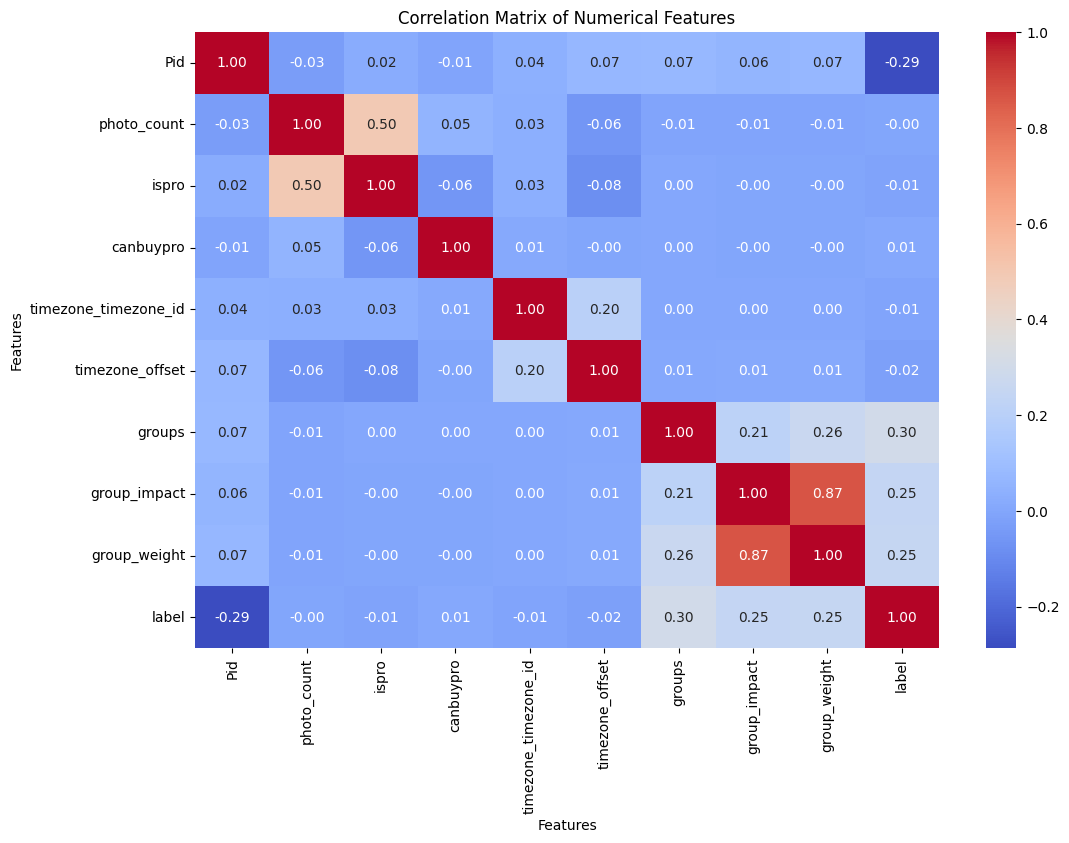

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Add titles and labels for clarity
plt.title('Correlation Matrix of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [61]:
data['Title'].value_counts()

Title
USO Show Troupe Independence Day Tour                                                                                                                                                                                                                              532
Grand Farewell to Dean of Students Gary Clinton                                                                                                                                                                                                                    530
S & B Wedding                                                                                                                                                                                                                                                      469
Fittest On The Beach                                                                                                                                                                                         

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251295 entries, 0 to 251294
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   image                 251295 non-null  object 
 1   Pid                   251295 non-null  int64  
 2   Uid                   251295 non-null  object 
 3   Category              251295 non-null  object 
 4   Subcategory           251295 non-null  object 
 5   Concept               251295 non-null  object 
 6   Title                 251295 non-null  object 
 7   Alltags               251295 non-null  object 
 8   photo_count           251295 non-null  float64
 9   ispro                 251295 non-null  int64  
 10  canbuypro             251295 non-null  int64  
 11  timezone_timezone_id  251295 non-null  int64  
 12  timezone_offset       251295 non-null  int64  
 13  Pathalias             173499 non-null  object 
 14  groups                251295 non-null  float64
 15  

In [63]:
data['Uid'].value_counts()

Uid
31253@N15     1373
32024@N27     1240
50945@N5      1120
37936@N48     1101
60519@N0      1096
              ... 
40749@N38        1
40744@N71        1
40743@N35        1
40740@N74        1
108435@N35       1
Name: count, Length: 32345, dtype: int64

In [64]:
data['Pathalias'].value_counts()

Pathalias
siomarq            1373
peeebeee           1120
esteemedhelga      1101
autisticreality    1096
estudioobjetivo    1059
                   ... 
imperatricks          1
afonsocastella        1
juanrojo              1
canadagood            1
matty3126             1
Name: count, Length: 19909, dtype: int64

In [65]:
data

,image,Pid,Uid,Category,Subcategory,Concept,Title,Alltags,photo_count,ispro,...,Pathalias,groups,group_impact,group_weight,label,year,month,day,hour,dayofweek
0,images/385070026.jpg,775,59@N75,Fashion,Fashion,glam,Luis Drayton - Edinburgh shoot #6,rock punk transgender tranny electronicmusic e...,8.829,1,...,luisdrayton,0.026,0.012,0.026,11.180,2015,10,28,7,2
1,images/943750056.jpg,1075,1@N18,Travel&Active&Sports,Soccer,fifa,Arena da Barra - Arena HSBC - Arena do PAN #...,brazil rio brasil riodejaneiro by maria fifa m...,10.377,1,...,claudiolara,0.005,0.005,0.003,15.150,2016,2,9,2,1
2,images/3246928439.jpg,4890,351@N64,Entertainment,Movies,cinema,MARILYN 2015,old cinema beauty marilyn photoshop movie joke...,5.624,0,...,rizzato,0.000,0.000,0.000,10.990,2015,6,1,0,0
3,images/3538960847.jpg,7079,1617@N40,Food,Drinks,thirsty,CAMELS01,hot sahara animal animals desert bottles drink...,10.377,1,...,glosackmd,0.001,0.003,0.009,11.160,2015,3,7,16,5
4,images/3544037429.jpg,7111,1617@N40,Travel&Active&Sports,Gymnastics,flip,INDIA0457/ MY CHRISTMAS 2015 CARD.........,street people india portraits photography delh...,10.377,1,...,glosackmd,0.001,0.006,0.001,12.740,2015,3,21,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251290,images/27597418605.jpg,1118328,62225@N20,Animal,Insects,creature,Mushrooms,york travel sky urban sun france color tree gr...,9.024,1,...,NaN,0.006,0.148,0.161,4.000,2015,6,6,7,5
251291,images/27597517425.jpg,1118334,108435@N35,Social&People,Selfies,portrait,Evie,portrait cute animal cat furry panasonic calic...,6.687,0,...,matty3126,0.006,0.037,0.040,1.000,2015,8,15,9,5
251292,images/27597606545.jpg,1118342,84730@N71,Travel&Active&Sports,Cars,exotic,BSSLS+R8GT!!,car exotic german malaysia kualalumpur superca...,6.354,0,...,khooxotics,0.000,0.000,0.000,2.000,2015,10,10,7,5
251293,images/27597637235.jpg,1118344,9542@N37,Whether&Season,Cloudy,cloud,C to A1,city newzealand christchurch cloud building ca...,8.877,1,...,stevetaylors,0.001,0.086,0.063,6.890,2015,9,17,3,3


In [66]:
data['combined_text'] = data['Title'] + " " + data['Alltags']
data

,image,Pid,Uid,Category,Subcategory,Concept,Title,Alltags,photo_count,ispro,...,groups,group_impact,group_weight,label,year,month,day,hour,dayofweek,combined_text
0,images/385070026.jpg,775,59@N75,Fashion,Fashion,glam,Luis Drayton - Edinburgh shoot #6,rock punk transgender tranny electronicmusic e...,8.829,1,...,0.026,0.012,0.026,11.180,2015,10,28,7,2,Luis Drayton - Edinburgh shoot #6 rock punk tr...
1,images/943750056.jpg,1075,1@N18,Travel&Active&Sports,Soccer,fifa,Arena da Barra - Arena HSBC - Arena do PAN #...,brazil rio brasil riodejaneiro by maria fifa m...,10.377,1,...,0.005,0.005,0.003,15.150,2016,2,9,2,1,Arena da Barra - Arena HSBC - Arena do PAN #...
2,images/3246928439.jpg,4890,351@N64,Entertainment,Movies,cinema,MARILYN 2015,old cinema beauty marilyn photoshop movie joke...,5.624,0,...,0.000,0.000,0.000,10.990,2015,6,1,0,0,MARILYN 2015 old cinema beauty marilyn photosh...
3,images/3538960847.jpg,7079,1617@N40,Food,Drinks,thirsty,CAMELS01,hot sahara animal animals desert bottles drink...,10.377,1,...,0.001,0.003,0.009,11.160,2015,3,7,16,5,CAMELS01 hot sahara animal animals desert bott...
4,images/3544037429.jpg,7111,1617@N40,Travel&Active&Sports,Gymnastics,flip,INDIA0457/ MY CHRISTMAS 2015 CARD.........,street people india portraits photography delh...,10.377,1,...,0.001,0.006,0.001,12.740,2015,3,21,5,5,INDIA0457/ MY CHRISTMAS 2015 CARD......... str...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251290,images/27597418605.jpg,1118328,62225@N20,Animal,Insects,creature,Mushrooms,york travel sky urban sun france color tree gr...,9.024,1,...,0.006,0.148,0.161,4.000,2015,6,6,7,5,Mushrooms york travel sky urban sun france col...
251291,images/27597517425.jpg,1118334,108435@N35,Social&People,Selfies,portrait,Evie,portrait cute animal cat furry panasonic calic...,6.687,0,...,0.006,0.037,0.040,1.000,2015,8,15,9,5,Evie portrait cute animal cat furry panasonic ...
251292,images/27597606545.jpg,1118342,84730@N71,Travel&Active&Sports,Cars,exotic,BSSLS+R8GT!!,car exotic german malaysia kualalumpur superca...,6.354,0,...,0.000,0.000,0.000,2.000,2015,10,10,7,5,BSSLS+R8GT!! car exotic german malaysia kualal...
251293,images/27597637235.jpg,1118344,9542@N37,Whether&Season,Cloudy,cloud,C to A1,city newzealand christchurch cloud building ca...,8.877,1,...,0.001,0.086,0.063,6.890,2015,9,17,3,3,C to A1 city newzealand christchurch cloud bui...


In [67]:
data.columns

Index(['image', 'Pid', 'Uid', 'Category', 'Subcategory', 'Concept', 'Title',
       'Alltags', 'photo_count', 'ispro', 'canbuypro', 'timezone_timezone_id',
       'timezone_offset', 'Pathalias', 'groups', 'group_impact',
       'group_weight', 'label', 'year', 'month', 'day', 'hour', 'dayofweek',
       'combined_text'],
      dtype='object')

In [68]:
data= data[['image', #image_path ofr loading and generating image embeddings
            'Pid', #unique identifier of image
            'Uid', #unique identifier of user
            'Category', 'Subcategory', 'Concept', #category columns
            'combined_text', #text column for generating sbert embedding
             'ispro', 'canbuypro', #binary features column
            'photo_count', 'timezone_timezone_id', 'timezone_offset', 'groups', 'group_impact', 'group_weight', #numerical features column
            'year', 'month', 'day', 'hour', 'dayofweek', #temporal features (numerical) column
            'label' #target
            ]]

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251295 entries, 0 to 251294
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   image                 251295 non-null  object 
 1   Pid                   251295 non-null  int64  
 2   Uid                   251295 non-null  object 
 3   Category              251295 non-null  object 
 4   Subcategory           251295 non-null  object 
 5   Concept               251295 non-null  object 
 6   combined_text         251295 non-null  object 
 7   ispro                 251295 non-null  int64  
 8   canbuypro             251295 non-null  int64  
 9   photo_count           251295 non-null  float64
 10  timezone_timezone_id  251295 non-null  int64  
 11  timezone_offset       251295 non-null  int64  
 12  groups                251295 non-null  float64
 13  group_impact          251295 non-null  float64
 14  group_weight          251295 non-null  float64
 15  

In [70]:
import os
os.getcwd()

'd:\\old\\data255_deeplearning_team2\\data\\raw'

In [71]:
data.to_csv('data_preprocessed.csv', index=False)

# modeling text features

In [91]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

In [74]:
import re 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\31405.ISBDOMAIN1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\31405.ISBDOMAIN1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\31405.ISBDOMAIN1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [75]:
# additional steps
def remove_punctuations(text):
    punct_tag = re.compile(r'[^\w\s]')
    return punct_tag.sub(r' ', text)

def remove_url(text):
    url_clean = re.compile(r"https://\S+|www\.\S+")
    return url_clean.sub(r'', text)

def remove_emoji(text):
    emoji_clean = re.compile("[" 
                             u"\U0001F600-\U0001F64F"  # emoticons
                             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                             u"\U0001F680-\U0001F6FF"  # transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                             u"\U00002702-\U000027B0"
                             u"\U000024C2-\U0001F251"
                             "]+", flags=re.UNICODE)
    return emoji_clean.sub(r'', text)

## a. Text preprocessing steps: 
# 1. Tokenization,
# 2. Stopwords removing,
# 3. HTML removing,
# 4. Convert to lower case,
# 5. Lemmatization/stemming
## additional- remove_punctuations. remove_url. remove_emoji.

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    text = remove_url(text)
    text = remove_emoji(text)
    text = remove_punctuations(text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Rejoin words into a processed string
    return ' '.join(words)

In [76]:
from joblib import Parallel, delayed
from tqdm import tqdm

In [77]:
def parallel_preprocessing(df, func):
    # Using 'delayed' to apply 'func' to each item in 'df'
    results = Parallel(n_jobs=1)(delayed(func)(text) for text in tqdm(df, position=0))
    return results

data['combined_text'] = parallel_preprocessing(data['combined_text'], preprocess_text)

100%|██████████| 251295/251295 [03:33<00:00, 1178.07it/s]
C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\3\ipykernel_9600\833160835.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['combined_text'] = parallel_preprocessing(data['combined_text'], preprocess_text)


In [93]:
# Assuming 'combined_text' is your text column
text_embeddings = model.encode(data['combined_text'].tolist(), 
                                             show_progress_bar=True, 
                                             batch_size=64,
                               )

Batches:   0%|          | 0/3927 [00:00<?, ?it/s]

In [94]:
# Save the embeddings to a NumPy file
np.save('text_embeddings.npy', text_embeddings)

In [97]:
np.save('text_embeddings_1000.npy', text_embeddings[:1000])

In [96]:
text_embeddings[0].shape

(384,)

In [98]:
data

,image,Pid,Uid,Category,Subcategory,Concept,combined_text,ispro,canbuypro,photo_count,...,timezone_offset,groups,group_impact,group_weight,year,month,day,hour,dayofweek,label
0,images/385070026.jpg,775,59@N75,Fashion,Fashion,glam,luis drayton edinburgh shoot 6 rock punk trans...,1,0,8.829,...,1,0.026,0.012,0.026,2015,10,28,7,2,11.180
1,images/943750056.jpg,1075,1@N18,Travel&Active&Sports,Soccer,fifa,arena da barra arena hsbc arena pan copabacana...,1,0,10.377,...,0,0.005,0.005,0.003,2016,2,9,2,1,15.150
2,images/3246928439.jpg,4890,351@N64,Entertainment,Movies,cinema,marilyn 2015 old cinema beauty marilyn photosh...,0,0,5.624,...,-3,0.000,0.000,0.000,2015,6,1,0,0,10.990
3,images/3538960847.jpg,7079,1617@N40,Food,Drinks,thirsty,camels01 hot sahara animal animal desert bottl...,1,0,10.377,...,0,0.001,0.003,0.009,2015,3,7,16,5,11.160
4,images/3544037429.jpg,7111,1617@N40,Travel&Active&Sports,Gymnastics,flip,india0457 christmas 2015 card street people in...,1,0,10.377,...,0,0.001,0.006,0.001,2015,3,21,5,5,12.740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251290,images/27597418605.jpg,1118328,62225@N20,Animal,Insects,creature,mushroom york travel sky urban sun france colo...,1,0,9.024,...,12,0.006,0.148,0.161,2015,6,6,7,5,4.000
251291,images/27597517425.jpg,1118334,108435@N35,Social&People,Selfies,portrait,evie portrait cute animal cat furry panasonic ...,0,0,6.687,...,-6,0.006,0.037,0.040,2015,8,15,9,5,1.000
251292,images/27597606545.jpg,1118342,84730@N71,Travel&Active&Sports,Cars,exotic,bssls r8gt car exotic german malaysia kualalum...,0,0,6.354,...,0,0.000,0.000,0.000,2015,10,10,7,5,2.000
251293,images/27597637235.jpg,1118344,9542@N37,Whether&Season,Cloudy,cloud,c a1 city newzealand christchurch cloud buildi...,1,0,8.877,...,10,0.001,0.086,0.063,2015,9,17,3,3,6.890


In [99]:
data.columns

Index(['image', 'Pid', 'Uid', 'Category', 'Subcategory', 'Concept',
       'combined_text', 'ispro', 'canbuypro', 'photo_count',
       'timezone_timezone_id', 'timezone_offset', 'groups', 'group_impact',
       'group_weight', 'year', 'month', 'day', 'hour', 'dayofweek', 'label'],
      dtype='object')

In [100]:
dff= data[['image', 'Pid', 'Uid', # unique identifiers ignore. embeddings and rows are in same order. Dont shuffle 
    'Category', 'Subcategory', 'Concept', #categorical embeddings keras
           'ispro', 'canbuypro', #binary features
           'photo_count', 'timezone_timezone_id', 'timezone_offset', 'groups', 'group_impact', 'group_weight', # numerical features
           'year', 'month', 'day', 'hour', 'dayofweek', #numerical_temporal features
           'label' #target continuous variable
           ]]

dff

,image,Pid,Uid,Category,Subcategory,Concept,ispro,canbuypro,photo_count,timezone_timezone_id,timezone_offset,groups,group_impact,group_weight,year,month,day,hour,dayofweek,label
0,images/385070026.jpg,775,59@N75,Fashion,Fashion,glam,1,0,8.829,9,1,0.026,0.012,0.026,2015,10,28,7,2,11.180
1,images/943750056.jpg,1075,1@N18,Travel&Active&Sports,Soccer,fifa,1,0,10.377,2,0,0.005,0.005,0.003,2016,2,9,2,1,15.150
2,images/3246928439.jpg,4890,351@N64,Entertainment,Movies,cinema,0,0,5.624,11,-3,0.000,0.000,0.000,2015,6,1,0,0,10.990
3,images/3538960847.jpg,7079,1617@N40,Food,Drinks,thirsty,1,0,10.377,2,0,0.001,0.003,0.009,2015,3,7,16,5,11.160
4,images/3544037429.jpg,7111,1617@N40,Travel&Active&Sports,Gymnastics,flip,1,0,10.377,2,0,0.001,0.006,0.001,2015,3,21,5,5,12.740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251290,images/27597418605.jpg,1118328,62225@N20,Animal,Insects,creature,1,0,9.024,49,12,0.006,0.148,0.161,2015,6,6,7,5,4.000
251291,images/27597517425.jpg,1118334,108435@N35,Social&People,Selfies,portrait,0,0,6.687,3,-6,0.006,0.037,0.040,2015,8,15,9,5,1.000
251292,images/27597606545.jpg,1118342,84730@N71,Travel&Active&Sports,Cars,exotic,0,0,6.354,2,0,0.000,0.000,0.000,2015,10,10,7,5,2.000
251293,images/27597637235.jpg,1118344,9542@N37,Whether&Season,Cloudy,cloud,1,0,8.877,20,10,0.001,0.086,0.063,2015,9,17,3,3,6.890


In [101]:
dff.to_csv('data_modeling_features_n_target.csv', index=False)

In [103]:
dff[:1000].to_csv('data_modeling_features_n_target_1000.csv', index=False)

In [ ]:
df= data.copy()

In [ ]:
df.columns

Index(['image', 'Pid', 'Uid', 'Category', 'Subcategory', 'Concept',
       'combined_text', 'ispro', 'canbuypro', 'photo_count',
       'timezone_timezone_id', 'timezone_offset', 'groups', 'group_impact',
       'group_weight', 'year', 'month', 'day', 'hour', 'dayofweek', 'label'],
      dtype='object')

In [ ]:
df['Concept'].nunique()

667

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Flatten

# Inputs
category_input = Input(shape=(1,), name='category_input')
subcategory_input = Input(shape=(1,), name='subcategory_input')
concept_input = Input(shape=(1,), name='concept_input')

# Embeddings
category_embedding = Embedding(input_dim=df['Category'].nunique(), output_dim=min(50, 1 + df['Category'].nunique()//2))(category_input)
subcategory_embedding = Embedding(input_dim=df['Subcategory'].nunique(), output_dim=min(50, 1 + df['Subcategory'].nunique()//2))(subcategory_input)
concept_embedding = Embedding(input_dim=df['Concept'].nunique(), output_dim=min(50, 1 + df['Concept'].nunique()//2))(concept_input)

In [ ]:
# Flatten embeddings
category_flatten = Flatten()(category_embedding)
subcategory_flatten = Flatten()(subcategory_embedding)
concept_flatten = Flatten()(concept_embedding)

In [ ]:
concept_flatten.shape

TensorShape([None, 50])